In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import NeuralNetwork as NN
import FFNetwork as FF
import Layer
import importlib
import time
from IPython.display import display
from ipywidgets import FloatProgress
from copy import deepcopy
importlib.reload(NN)
importlib.reload(FF)
importlib.reload(Layer);

dtype = torch.float
device = torch.device("cpu")
device = torch.device("cuda:0")

In [2]:
def ClassPlot(x, labels=[], idx=(1,2)):
    if len(labels)>0:
        colour_options = ['y', 'r', 'g', 'b', 'k']
        cidx = np.argmax(labels, axis=1)
        colours = [colour_options[k] for k in cidx]
        plt.scatter(x[:,idx[0]], x[:,idx[1]], color=colours, marker='.')
    else:
        plt.scatter(x[:,idx[0]], x[:,idx[1]], marker='.')
    plt.axis('equal');

## Create a simple dataset

In [539]:
# This creates a 3D -> 2D dataset
# A X = I
# where all elements of X are in (-1,1).
seed = 8544
torch.manual_seed(seed)
np.random.seed(seed)
B = np.eye(3)
X = 3.*(np.random.rand(5,3) - 0.5)
A = X.T
print('Bottom vectors')
print(B)
print('Top vectors')
print(A)

Bottom vectors
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Top vectors
[[-0.76078022  1.39440045 -0.92320171  0.63057751  1.45612172]
 [-1.27997494 -0.99975934 -1.38834162 -0.1456356   0.17142716]
 [ 0.58591674  0.75645847  1.21344945 -0.17968211 -1.23607117]]


In [3]:
# Make my own dataset
A = np.array([[ 1.3874, -0.2003,  0.4514],
              [-0.0967, -0.4015,  1.3332]])
#A = np.random.rand(2,3)
n_classes, top_dim = np.shape(A)
B = np.eye(n_classes)
#B = np.random.rand(n_classes, n_classes) - 0.5

print('Bottom vectors')
print(B)
print('Top vectors')
print(A)

Bottom vectors
[[1. 0.]
 [0. 1.]]
Top vectors
[[ 1.3874 -0.2003  0.4514]
 [-0.0967 -0.4015  1.3332]]


In [4]:
# Use A and B to make a dataset
n_classes, top_dim = np.shape(A)
bottom_dim = n_classes

training_samples = 300
noise = 0.2
training_input = []
training_output = []
for n in range(training_samples):
    r = np.random.randint(n_classes)
    training_input.append(B[r])
    training_output.append(A[r]+noise*np.random.normal(size=np.shape(A[r])))

training_input = torch.tensor(training_input).float()
training_output = torch.tensor(training_output).float()
train = [training_input, training_output]

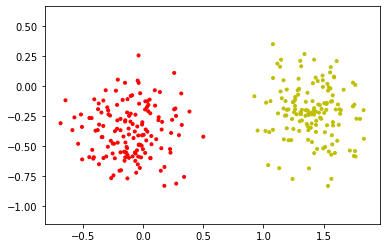

In [5]:
ClassPlot(train[1], labels=train[0], idx=(0,1))

In [130]:
# Create a network
ffnet = FF.Network()

af = 'identity'#'logistic'
ffnet.AddLayer(FF.Layer(n_nodes=top_dim, act=af))
ffnet.AddLayer(FF.Layer(n_nodes=bottom_dim, act=af))

cost = 'MSE'#'cross-entropy'
ffnet.SetCostFunction(cost)

initial_weights = deepcopy(ffnet.W[0])

for w in ffnet.W:
    print(initial_weights)

[[-0.87660769  2.9900091 ]
 [-1.44392387  0.81165375]
 [ 0.71999757 -2.73158794]]


In [131]:
ffnet.W[0] = initial_weights
for w in ffnet.W:
    print(w)

[[-0.87660769  2.9900091 ]
 [-1.44392387  0.81165375]
 [ 0.71999757 -2.73158794]]


In [132]:
progress = ffnet.SGD(train[1].numpy(), train[0].numpy(), lrate=0.01, weight_decay=0.01, bias_decay=0.0, epochs=500, batch_size=30, shuffle=False)

Epoch 0: Cost = 7.529086135569939
Epoch 1: Cost = 5.4679302354590344
Epoch 2: Cost = 4.00282083545032
Epoch 3: Cost = 2.9574415741529005
Epoch 4: Cost = 2.208363073784134
Epoch 5: Cost = 1.6690393790682978
Epoch 6: Cost = 1.2786761365823964
Epoch 7: Cost = 0.994480586760992
Epoch 8: Cost = 0.7862610055223905
Epoch 9: Cost = 0.6326596822303918
Epoch 10: Cost = 0.5185225781232478
Epoch 11: Cost = 0.4330605783008545
Epoch 12: Cost = 0.3685624840229072
Epoch 13: Cost = 0.31949291383290557
Epoch 14: Cost = 0.2818589880192624
Epoch 15: Cost = 0.2527649050629683
Epoch 16: Cost = 0.23009801825838508
Epoch 17: Cost = 0.21230706736009342
Epoch 18: Cost = 0.1982450890253733
Epoch 19: Cost = 0.1870577993562793
Epoch 20: Cost = 0.17810400770228788
Epoch 21: Cost = 0.17089864416933717
Epoch 22: Cost = 0.16507179298530086
Epoch 23: Cost = 0.1603390878677954
Epoch 24: Cost = 0.1564801997952734
Epoch 25: Cost = 0.15332311029829615
Epoch 26: Cost = 0.15073253869619696
Epoch 27: Cost = 0.1486013661225651

Epoch 350: Cost = 0.13826039577046914
Epoch 351: Cost = 0.13826039577046914
Epoch 352: Cost = 0.13826039577046914
Epoch 353: Cost = 0.13826039577046914
Epoch 354: Cost = 0.13826039577046914
Epoch 355: Cost = 0.13826039577046914
Epoch 356: Cost = 0.13826039577046914
Epoch 357: Cost = 0.13826039577046914
Epoch 358: Cost = 0.13826039577046914
Epoch 359: Cost = 0.13826039577046914
Epoch 360: Cost = 0.13826039577046914
Epoch 361: Cost = 0.13826039577046914
Epoch 362: Cost = 0.13826039577046914
Epoch 363: Cost = 0.13826039577046914
Epoch 364: Cost = 0.13826039577046914
Epoch 365: Cost = 0.13826039577046914
Epoch 366: Cost = 0.13826039577046914
Epoch 367: Cost = 0.13826039577046914
Epoch 368: Cost = 0.13826039577046914
Epoch 369: Cost = 0.13826039577046914
Epoch 370: Cost = 0.13826039577046914
Epoch 371: Cost = 0.13826039577046914
Epoch 372: Cost = 0.13826039577046914
Epoch 373: Cost = 0.13826039577046914
Epoch 374: Cost = 0.13826039577046914
Epoch 375: Cost = 0.13826039577046914
Epoch 376: C

In [133]:
FF.ClassificationAccuracy(ffnet.FeedForward(train[1].numpy()), train[0].numpy())

1.0

In [134]:
print(ffnet.W[0])

[[ 0.33323226 -0.07279887]
 [-0.03764777 -0.08942232]
 [ 0.06650283  0.32435818]]


## Create a Neural Network

In [135]:
importlib.reload(NN)
importlib.reload(FF)
importlib.reload(Layer);

net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=bottom_dim))
net.AddLayer(Layer.TopPELayer(n=top_dim))

sym = False
af = 'identity'
net.Connect(0, 1, act=af, symmetric=sym)

net.SetTau(1.0)
net.learning_tau = 0.8
net.learn_biases = False

net.connections[0].M = torch.tensor(initial_weights).float().to(device)
net.connections[0].W = net.connections[0].M.transpose(1,0)

identity


In [136]:
netx = net
netx.connections[0].SetM(ffnet.W[0])
netx.connections[0].SetW(ffnet.W[0].T)
netx.layers[0].SetBias(ffnet.lyr[1].b)

for c in netx.connections:
    print(c.M)
    print(c.W)
    
print(ffnet.lyr[1].b)

tensor([[ 0.3332, -0.0728],
        [-0.0376, -0.0894],
        [ 0.0665,  0.3244]], device='cuda:0')
tensor([[ 0.3332, -0.0376,  0.0665],
        [-0.0728, -0.0894,  0.3244]], device='cuda:0')
[0. 0.]


# Test Generation

In [137]:
classes = torch.eye(2)
print(classes)

tensor([[1., 0.],
        [0., 1.]])


In [138]:
netx.Reset()
netx.Allocate(classes)
netx.SetvDecay(0.01)
idx = (0,1)

z2 = netx.Predict(10., classes.to(device), dt=0.001)

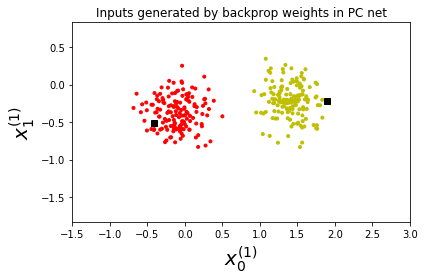

In [139]:
ClassPlot(train[1].cpu(), labels=train[0].cpu(), idx=idx)
plt.plot(np.array(z2[:,idx[0]].cpu()), np.array(z2[:,idx[1]].cpu()), 'ks');
plt.xlabel('$x_0^{(1)}$', fontsize=20)
plt.ylabel('$x_1^{(1)}$', fontsize=20)
plt.xlim((-1.5, 3))
plt.ylim((-3, 2))
plt.tight_layout()
plt.title('Inputs generated by backprop weights in PC net')
plt.tight_layout()
plt.savefig("backprop_decay.pdf", format='pdf')